In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Notar que todos los id son de uniprot. 

Primero cargamos los archivos
El archivo `01_all_dataset_positive´ contiene los pares de interacciones de tres bases de datos:
* hippie
* mint
* signor
Fue procesado previamente y se espera que no tenga repeticiones ni nulos.

Agregamos los datos positivos de la base de datos Negatome

In [2]:
df_pos_negatome = pd.read_csv("negatome_all_positives.csv", sep=',')
df_pos_negatome.columns = ['id_1', 'seq_1', 'id_2', 'seq_2']

if (df_pos_negatome.isnull().values.any()) == True:
    print("Hay valores nulos")

#Agregar columna que diga negatome
negatome = 'negatome'
df_pos_negatome['dataset'] = negatome

Veamos los datos que se repiten por orden (cambiar de lado los id)

In [3]:
# Sort id columns in each row
df_pos_negatome[['id_1', 'id_2']] = pd.DataFrame(np.sort(df_pos_negatome[['id_1', 'id_2']], axis=1), columns=['id_1', 'id_2'])
df_pos_negatome.info()

# Drop duplicate rows
df_negatome = df_pos_negatome.drop_duplicates(subset=['id_1','id_2'])
df_negatome.info()

# Check if there are any duplicate interactions left
duplicate_interactions = df_pos_negatome[df_pos_negatome.duplicated(subset=['id_1', 'id_2'])]

if duplicate_interactions.empty:
    print("No duplicate interactions found.")
else:
    print("Duplicate interactions found:")
    print(duplicate_interactions)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6200 entries, 0 to 6199
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id_1     6200 non-null   object
 1   seq_1    6200 non-null   object
 2   id_2     6200 non-null   object
 3   seq_2    6200 non-null   object
 4   dataset  6200 non-null   object
dtypes: object(5)
memory usage: 242.3+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 969 entries, 0 to 6191
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id_1     969 non-null    object
 1   seq_1    969 non-null    object
 2   id_2     969 non-null    object
 3   seq_2    969 non-null    object
 4   dataset  969 non-null    object
dtypes: object(5)
memory usage: 45.4+ KB
Duplicate interactions found:
        id_1                                              seq_1    id_2  \
1     P01887  IQKTPQIQVYSRHPPENGKPNILNCYVTQFHPPHIEIQMLKNGKKI...  P11609   
8     P07256 

Negatome posee 969 interacciones positivas únicas. 

Ahora importamos la base de datos existente anterior, que tiene datos de mint, hippie y signor.

In [4]:
df_three = pd.read_csv("01_all_dataset_positive.csv", sep=',')
df_three.columns = ['id_1', 'seq_1', 'id_2', 'seq_2', 'dataset']

Adicionamos las interacciones positivas procesadas de negatome.

In [5]:
df_pairs = pd.concat([df_three, df_negatome], axis=0)

Revisar si hay nulos.

In [6]:
if (df_pairs.isnull().values.any()) == True:
    print("Hay valores nulos")

Revisar si son únicos los valores. También si se dan vuelta.

In [7]:
# Sort id columns in each row
df_pairs[['id_1', 'id_2']] = pd.DataFrame(np.sort(df_pairs[['id_1', 'id_2']], axis=1), columns=['id_1', 'id_2'])

df_main = df_pairs.drop_duplicates(subset=['id_1','id_2'])
df_main.info()

# Check if there are any duplicate interactions left
duplicate_interactions = df_pairs[df_pairs.duplicated(subset=['id_1', 'id_2'])]

if duplicate_interactions.empty:
    print("No duplicate interactions found.")
else:
    print("Duplicate interactions found:")
    print(duplicate_interactions)

<class 'pandas.core.frame.DataFrame'>
Index: 847330 entries, 0 to 847329
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id_1     847330 non-null  object
 1   seq_1    847330 non-null  object
 2   id_2     847330 non-null  object
 3   seq_2    847330 non-null  object
 4   dataset  847330 non-null  object
dtypes: object(5)
memory usage: 38.8+ MB
Duplicate interactions found:
            id_1                                              seq_1    id_2  \
0     A0A023PXA5  IQKTPQIQVYSRHPPENGKPNILNCYVTQFHPPHIEIQMLKNGKKI...  P33302   
2     A0A023PXP4  MIQRTPKIQVYSRHPAENGKSNFLNCYVSGFHPSDIEVDLLKNGER...  P39743   
3     A0A023PYF7  VTDQLEDLREHFKNTEEGKALVHHYEECAERVKIQQQQPGYADLEH...  P39743   
4     A0A023PZD0  MPQSFTSIARIGDYILKSPVLSKLCVPVANQFINLAGYKKLGLKFD...  P53281   
5     A0A023PZD0  MAFRKSNVYLSLVNSYIIDSPQPSSINYWWNMGSLLGLCLVIQIVT...  P80667   
...          ...                                                ...     ...   
6180 

Todos los valores que habían duplicados correspondían a Negatome. Entonces ahora cuantificamos y caracterizamos la base de datos.
Primero, contar los datos que tiene. 

In [8]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 847330 entries, 0 to 847329
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id_1     847330 non-null  object
 1   seq_1    847330 non-null  object
 2   id_2     847330 non-null  object
 3   seq_2    847330 non-null  object
 4   dataset  847330 non-null  object
dtypes: object(5)
memory usage: 38.8+ MB


Se tienen 847.330 interacciones únicas. Ahora veamos las proteínas únicas. 
Para ello ocupamos las filas con sus id y los concatenamos, luego eliminamos los duplicados. 

In [9]:
df_1 = df_main.filter(['id_1','seq_1'], axis=1)
df_1.columns = ['id_seq','seq']

df_2 = df_main.filter(['id_2','seq_2'], axis=1)
df_2.columns = ['id_seq','seq']

#concatenar
df_all_seq = pd.concat([df_1, df_2])

df_unique_seq = df_all_seq.drop_duplicates(subset=['id_seq'],ignore_index=True)
df_unique_seq.info()
# df_unique_seq.reset_index(drop=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43568 entries, 0 to 43567
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id_seq  43568 non-null  object
 1   seq     43568 non-null  object
dtypes: object(2)
memory usage: 680.9+ KB


In [10]:
df_unique_seq.head()

,id_seq,seq
0,A0A023PXA5,MLLSELVATASSLPYTAISIHNNCRVPAARHIHHGCRYFHGPPVMH...
1,A0A023PXP4,MLIGAPSNMRLRGALELLWRRLLHGLMQLRLVLKMHICSQLNHAIK...
2,A0A023PYF7,MTVLLEHPLGPDSSRILCLALGKNMASKASCTSLSFLLCMATCSKQ...
3,A0A023PZD0,MTIVHFVGSLFFFFFFSYIFFYNDHGLYTWGCNFAMESPSPTSSPS...
4,A0A023PZE8,MSETCSSSLALLHKILHIHSHTPSVYYNICISVRILTSERLQCFFF...


En la base de datos existen *43.568* secuencias únicas de proteínas.

Ahora caracterizamos las proteínas de la base de datos. Para ello necesitamos saber la cantidad de aminoácidos que tienen sus secuencias. 

In [11]:
# definir un array vacío
largos_seq_1 = []
largos_seq_2 = []

for i in range(0,len(df_main)):
    s1 = df_main['seq_1'][i]
    largos_seq_1.append(len(s1))
    
    s2 = df_main['seq_2'][i]
    largos_seq_2.append(len(s2))

df_len_id_1 = pd.DataFrame(largos_seq_1)
df_len_id_2 = pd.DataFrame(largos_seq_2)

In [12]:
df_junto = pd.concat([df_len_id_1,df_len_id_2], axis=1)
df_junto.columns = ['seq_1','seq_2']
df_junto

,seq_1,seq_2
0,189,1511
1,189,1157
2,132,482
3,126,482
4,216,241
...,...,...
847325,334,130
847326,334,219
847327,130,130
847328,219,130


In [13]:
df_junto.describe()

,seq_1,seq_2
count,847330.000000,847330.000000
mean,582.985125,681.898483
std,553.437681,797.928795
min,7.000000,9.000000
25%,277.000000,305.000000
50%,444.000000,501.000000
75%,726.000000,808.000000
max,35213.000000,35213.000000


Analizemos las secuencias únicas. 

In [14]:
# definir un array vacío
largos_seq_uniq = []

for i in range(0,len(df_unique_seq)):
    s = df_unique_seq['seq'][i]
    largos_seq_uniq.append(len(s))

df_len_uniq_n = pd.DataFrame(largos_seq_uniq) # sin id
df_uniq_id = df_unique_seq.filter(items=['id_seq'])
df_len_uniq = pd.concat([df_uniq_id,df_len_uniq_n],axis=1)
df_len_uniq.columns =['id', 'length']

df_len_uniq.head()

,id,length
0,A0A023PXA5,189
1,A0A023PXP4,132
2,A0A023PYF7,126
3,A0A023PZD0,216
4,A0A023PZE8,133


In [15]:
df_len_uniq.describe()

,length
count,43568.000000
mean,593.085774
std,594.980030
min,7.000000
25%,280.000000
50%,450.000000
75%,733.000000
max,35213.000000


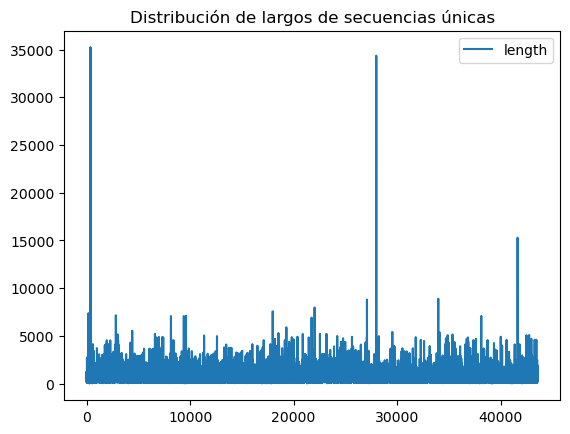

In [16]:
plot_unique = df_len_uniq.plot(kind='line', title="Distribución de largos de secuencias únicas")

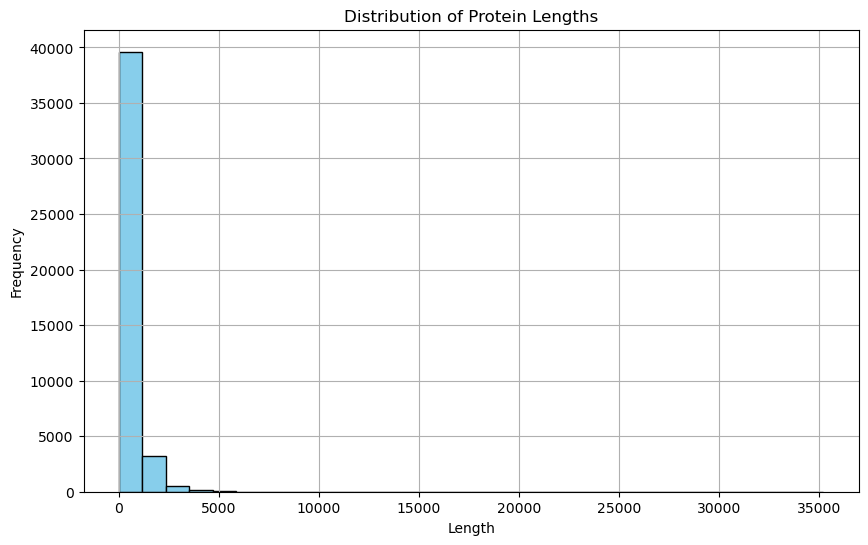

In [17]:
# Plot the distribution of protein lengths
plt.figure(figsize=(10, 6))
plt.hist(df_len_uniq['length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Protein Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


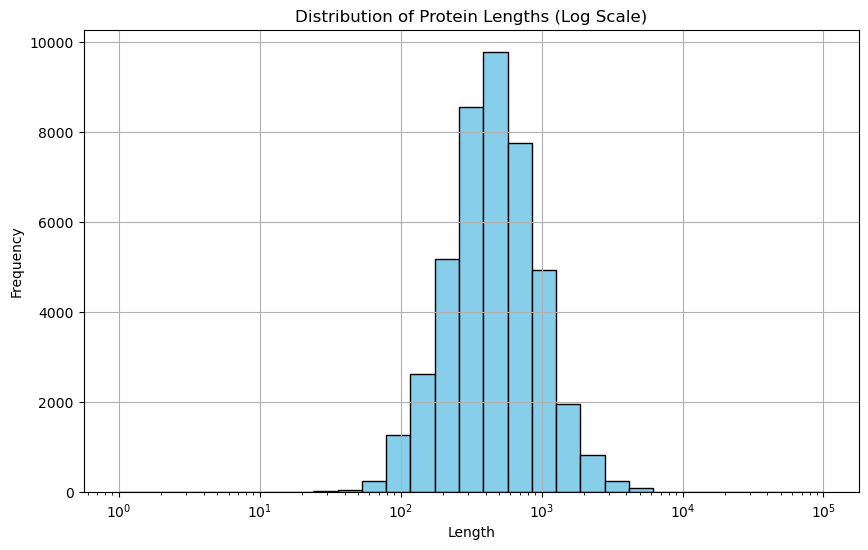

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(df_len_uniq['length'], bins=np.logspace(0, 5, 30), color='skyblue', edgecolor='black')
plt.xscale('log')
plt.title('Distribution of Protein Lengths (Log Scale)')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

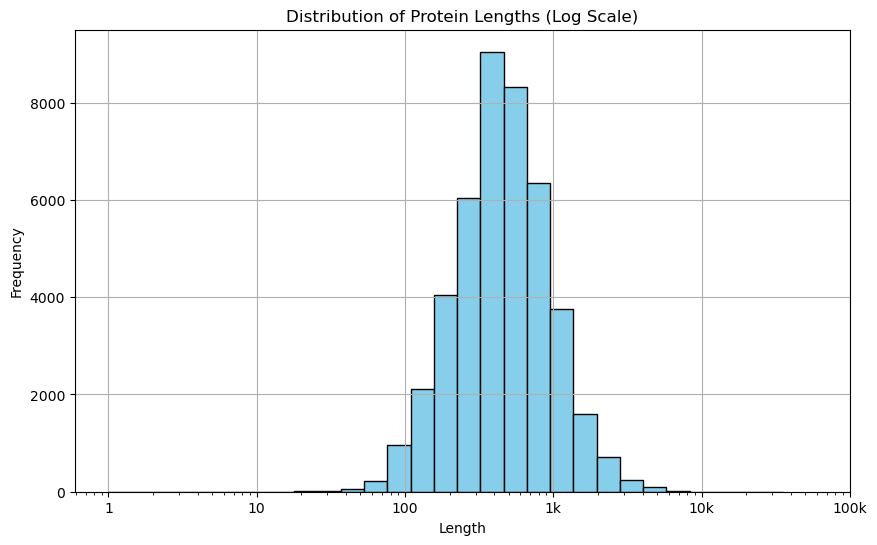

In [19]:
# Define bins for logarithmic scale
log_bins = np.logspace(0, np.log10(df_len_uniq['length'].max()), 30)

# Plot the distribution of protein lengths on a logarithmic scale
plt.figure(figsize=(10, 6))
plt.hist(df_len_uniq['length'], bins=log_bins, color='skyblue', edgecolor='black')
plt.xscale('log')
plt.title('Distribution of Protein Lengths (Log Scale)')
plt.xlabel('Length')
plt.ylabel('Frequency')

# Define custom x-axis ticks
xticks = [1, 10, 100, 1000, 10000, 100000]
xtick_labels = ['1', '10', '100', '1k', '10k', '100k']
plt.xticks(xticks, xtick_labels)

plt.grid(True)
plt.show()

Text(0, 0.5, 'N° of aminoacids')

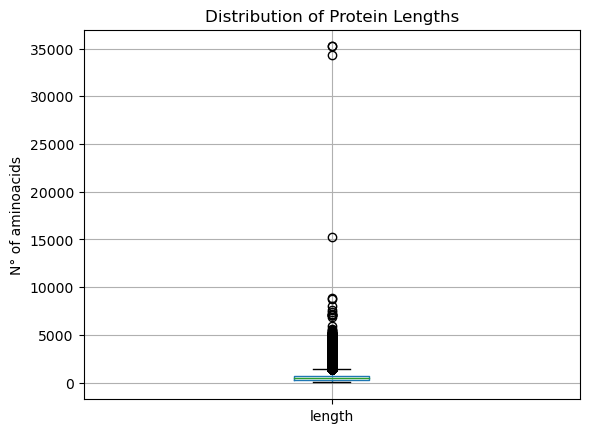

In [23]:
boxplot = df_len_uniq.boxplot(column=['length'])
plt.title('Distribution of Protein Lengths')
plt.ylabel('N° of aminoacids')

In [25]:
df_main.to_csv('all_positive_data.csv')

In [20]:
print(df_main.iloc[6,2])
print(len(df_main.iloc[0,1]))

P36141
189
